<a id=start></a>
# Parser for Apophis Testing

Includes toggle for plotting original or buffered data. <br>
Does not include any fixes for bad data

#### Shortcuts to Sections:
* [Setup](#start)
* [Load & Parse Data](#parsing)
* [Save Parsed Data to Frickle file](#saveFrickle)
* [Plotting Section](#plotting)

### In cell below:
> Enter data path, file name. <br>
> Choose 'original' or 'repeat'.<br>
> Specific plot parameters (e.g. time range) can be adjusted in the last cell.

In [1]:
# path = "../delamere_data/delamere_flight_data/" # Path to saved file on local machine
# file_name = "data_file_115k_usbmodem145101.txt"
# path = "kinetx_data/dallas/" # Path to saved file on local machine
# file_name = "Dallas1_FlightData_5-16-2021.txt"
# file_name = "Flight-data_file_230k_1-05_16_21.txt"

# path ="./"
# file_name = "20230515T171854Z_data_usbserial-FT611XTT3_230400_15.bin"
# path = "./data/"
# file_name = "20230614T193044Z_data_usbserial-FT611XTT3_230400_shield29-first-plasma-test-C_29.bin"
# path = "./data/apophisChamber/19June2023/"
# file_name = "20230619T164554Z_data_usbserial-FT611XTT3_230400_shield28-plasmatest-rollA_28.bin"
# file_name = "20230619T170046Z_data_usbserial-FT611XTT3_230400_shield28-plasmatest-pitchA_28.bin"
# file_name = "20230619T171535Z_data_usbserial-FT611XTT3_230400_shield28-plasmatest-rollB_28.bin"
# file_name = "20230619T172226Z_data_usbserial-FT611XTT3_230400_shield28-plasmatest-pitchB_28.bin"

# path = "./data/apophisChamber/21June/"
# # file_name = '20230621T162132Z_data_usbserial-FT611XTT3_230400_shield29-plasmatest-rollA_29.bin'
# # file_name = '20230621T163500Z_data_usbserial-FT611XTT3_230400_shield29-plasmatest-pitchA_29.bin'
# # file_name = '20230621T164914Z_data_usbserial-FT611XTT3_230400_shield29-plasmatest-rollB_29.bin'
# # file_name = '20230621T165241Z_data_usbserial-FT611XTT3_230400_shield29-plasmatest-rollC_29.bin'
# file_name = '20230621T170012Z_data_usbserial-FT611XTT3_230400_shield29-plasmatest-pitchB_29.bin'

# path = "./data/apophisChamber/03July2023/"
# file_name = "20230703T171632Z_data_usbserial-FT611XTT3_230400_shield30-plasmatest-rollA_30.bin"
# file_name = "20230703T173220Z_data_usbserial-FT611XTT3_230400_shield30-plasmatest-pitchA2_30.bin"
# file_name = "20230703T174926Z_data_usbserial-FT611XTT3_230400_shield30-plasmatest-rollB_30.bin"
# file_name = "20230703T175645Z_data_usbserial-FT611XTT3_230400_shield30-plasmatest-pitchB_30.bin"

# path = "./data/Apophis/11-12Jan2024_chamberTest/"
# file_name = "20240111T193340Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-air_0.bin"
# file_name = "20240112T202104Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmaturnON_33.bin"
# file_name = "20240112T203517Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmatest-rollA_33.bin"
# file_name = "20240112T204553Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmatest-pitchA_33.bin"
# file_name = "20240112T210703Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmatest-rollBattempt1_33.bin"

# file_name = "20240112T224156Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmatest-rollB_33.bin"
# file_name = "20240112T225041Z_data_usbserial-FT611XTT0_230400_shield33-chambertest-plasmatest-pitchB_33.bin"

# path = "./data/Apophis/16Jan2024_chamberTest/"
# file_name = "20240116T195012Z_data_usbserial-FT611XTT0_230400_shield35-plasmatest-rollA_35.bin"
# file_name = "20240116T200619Z_data_usbserial-FT611XTT0_230400_shield35-plasmatest-pitchA_35.bin"
# file_name = "20240116T202508Z_data_usbserial-FT611XTT0_230400_shield35-plasmatest-rollB_35.bin"
# file_name = "20240116T203603Z_data_usbserial-FT611XTT0_230400_shield35-plasmatest-pitchB_35.bin"

# path = "./data/Apophis/18Jan2024_chamberTest/"
# # file_name = "20240118T211037Z_data_usbserial-FT611XTT0_230400_shield34-plasmatest-rollA_34.bin"
# # file_name = "20240118T212729Z_data_usbserial-FT611XTT0_230400_shield34-plasmatest-pitchA_34.bin"
# # file_name = "20240118T214622Z_data_usbserial-FT611XTT0_230400_shield34-plasmatest-rollB_34.bin"
# file_name = "20240118T215730Z_data_usbserial-FT611XTT0_230400_shield34-plasmatest-pitchB_34.bin"

path = "./apep2_data/"
file_name = "04-08_Apep392_Swarm_FlightData_UDP_Bob33.bin"
# file_name = "04-08_Apep393_Swarm_FlightData_UDP_Bob34.bin"
# file_name = "04-08_Apep394_Swarm_FlightData_UDP_Bob35.bin"

plottype = 'original' # Choose 'original' or 'repeat'

interruptOffset = 0 # Offset between interrupt timestamps and imu/sweep timestamps
# interruptOffset = -8.0062 # KiNET-X Mission's time offset between interrupt timestamps and imu/sweep timestamps
T0_offset = 0 # Right now ONLY affect the sweepSampleTime NOT sweepTime or imuTime
# T0_offset = 572.732

In [2]:
import sys
import os
import matplotlib
if 'matplotlib.pyplot' not in sys.modules.keys():
    matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
from bitstring import BitArray

## Custom Library
import parser_lib

%matplotlib notebook

dataFile = os.path.join(path, file_name)



<a id="parsing"></a>
### Load & Parse Data

In [ ]:
f = open(dataFile, 'rb')
rawData = f.read()

## Set parameters
buffered=True; dim=int(buffered)+1 # Whether 
# data scales:
scale_dct = {'time': 1e-6, 'acc': 4./2**15, 'mag': 1./2**15, 'gyr': 2000./360/2**15, 'pip': 5./2**14} 
# t_scale = 1.e-6; a_scale = 4./2**15; m_scale = 1./2**15; g_scale = 2000./360/2**15; p_scale = 5./2**14 # data scales
# Sentinel strings: 
sentinels = ['0x232353','0x232349','0x232354','0x23234A'] # ['##S','##I','##T','##J']
sentinel_size = 3
# Various sample

freq = 45 # approximate message frequency in Hz
num_samples = 28 # how many samples per pip per sweep message
num_swp_bytes = 4 + 1 + num_samples * 2 * 2 # 4 times bytes, 1 id byte, 2 bytes per sample per 2 pips
num_imu_bytes = 4 + (3 + 3 + 3 + 1) * 2 # 4 time bytes, xyz for agm each 2 bytes, 2 temp bytes
num_msg_bytes = (2*sentinel_size + num_swp_bytes + num_imu_bytes)*dim

bytesRaw = BitArray(rawData) # read bytes from standard input
ids_swp = list(bytesRaw.findall(sentinels[0], bytealigned=False))
ids_imu = list(bytesRaw.findall(sentinels[1], bytealigned=False))
if buffered:
    ids_swp_buf = list(bytesRaw.findall(sentinels[2], bytealigned=False))
    ids_imu_buf = list(bytesRaw.findall(sentinels[3], bytealigned=False))
else:
    ids_swp_buf = ids_swp
    ids_imu_buf = ids_imu

num_data_swp = max(len(ids_swp),len(ids_swp_buf))*num_samples # sweep data is repeated per sweep sample
num_data_imu = max(len(ids_imu),len(ids_imu_buf))

# initialize data arrays
sweepTime_arr = np.zeros([dim,num_data_swp],dtype='single')
payload_id = np.zeros([dim,num_data_swp],dtype='uint8')
pip_volts = np.zeros([dim,2,num_data_swp],dtype='single')
imuTime_arr = np.zeros([dim,num_data_imu],dtype='single')
acc_arr = np.zeros([dim,3,num_data_imu],dtype='single')
mag_arr = np.zeros([dim,3,num_data_imu],dtype='single')
gyr_arr = np.zeros([dim,3,num_data_imu],dtype='single')

# imuTime_arr[0], acc_arr[0], mag_arr[0], gyr_arr[0] = parse_swp(ids_swp,False, dim=1)
# sweepTime_arr[0], payload_id, pip_volts[0] = parse_imu(ids_imu,False, dim=1)
print('Start Parsing')
imuTime_arr[0], acc_arr[0], mag_arr[0], gyr_arr[0] = parser_lib.parse_imu(bytesRaw, ids_imu, is_buffer_data=False, sentinels=sentinels, num_imu_bytes=num_imu_bytes, num_dat_imu=num_data_imu, scale_dct=scale_dct)
print('Finished IMU Parse')
sweepTime_arr[0], payload_id, pip_volts[0] = parser_lib.parse_swp(bytesRaw, ids_swp, is_buffer_data=False, sentinels=sentinels, num_swp_bytes=num_swp_bytes, num_dat_swp=num_data_swp, num_samples=num_samples, freq=freq, scale_dct=scale_dct)
print('Finished Sweep Parse')

if buffered:
    imuTime_arr[1], acc_arr[1], mag_arr[1], gyr_arr[1] = parser_lib.parse_imu(bytesRaw, ids_imu_buf, is_buffer_data=True, sentinels=sentinels, num_imu_bytes=num_imu_bytes, num_dat_imu=num_data_imu, scale_dct=scale_dct)
    print('Finished Buffered IMU Parse')
    sweepTime_arr[1], payload_id2, pip_volts[1] = parser_lib.parse_swp(bytesRaw, ids_swp_buf, is_buffer_data=True, sentinels=sentinels, num_swp_bytes=num_swp_bytes, num_dat_swp=num_data_swp, num_samples=num_samples, freq=freq, scale_dct=scale_dct)
    print('Finished Buffered Sweep Parse')     
print('Done Parsing')

# measured values
imu_cad = np.diff(imuTime_arr,append=np.nan)*1e3 # imu cadence in ms
imu_cad_avg = np.nanmedian(imu_cad)
imu_freq = 1e3/imu_cad_avg # imu frequency in Hz
pip0_std = np.nanstd(pip_volts[0,0,:-100])*1e3 # pip 0 standard deviation
pip1_std = np.nanstd(pip_volts[0,1,:-100])*1e3 # pip 1 standard deviation

f.close()

Start Parsing


In [28]:
print(imuTime_arr[0])
print(imuTime)
print(len(imuTime_arr[0]))
print(len(imuTime))

print(sweepTime_arr[0])
print(sweepTime)
print(len(sweepTime_arr[0]))
print(len(sweepTime))
print(len(np.where(sweepTime_arr[0]!=0)[0]))

# print(max(len(ids_imu),len(ids_imu_buf))) 
# print(imuTime_arr.shape)
# # payload_id2.shape
# print(max(len(ids_swp),len(ids_swp_buf))*num_samples)
# print(sweepTime_arr.shape)
# print(len(np.where(sweepTime_arr[0]!=0)[0]))
# print(len(np.where(sweepTime_arr[1]!=0)[0]))

[314.62314 314.73413 314.84512 ...   0.        0.        0.     ]
[314.623128 314.734128 314.756324 ... 941.151528 941.173732 941.195924]
27622
27641
[314.7316 314.7324 314.7332 ...   0.       0.       0.    ]
[314.7316   314.753796 314.842604 ... 941.149    941.171204 941.193396]
773864
27649
759248


In [ ]:
## Optional (?) Filtering 
# # find invalid timestamps
# inv_ids_swp = (sweepTime_arr==0) | (sweepTime_arr>max_time)
# inv_ids_imu = (imuTime_arr==0) | (imuTime_arr>max_time)


In [78]:
np.unique([len(bytes.fromhex(sentinalStr.split('x')[-1])) for sentinalStr in sentinels])
# nextOne = sentLst[0]
# if nextOne in sentinels: print('yes')
# tmp = BitArray(sentinels[0])

# +++++----------+++++

# # ascii(0x232353)
# # bytes.fromhex(0x232353)
# # bytes.fromhex('0x232353')

array([3])

In [21]:
class IMUData():
    def __init__(self):

        self.time = []; self.temp = []
        self.ax = []; self.ay = []; self.az = []
        self.mx = []; self.my = []; self.mz = []
        self.gx = []; self.gy = []; self.gz = []
        
        self.timeRpt = []; self.tempRpt = []
        self.axRpt = []; self.ayRpt = []; self.azRpt = []
        self.mxRpt = []; self.myRpt = []; self.mzRpt = []
        self.gxRpt = []; self.gyRpt = []; self.gzRpt = []
        
class SweepData():
    def __init__(self):
        self.time = []
        self.pip0 = []; self.pip1 = [];
        
        self.timeRpt = []
        self.pip0Rpt = []; self.pip1Rpt = [];
        
class PayloadData():
    def __init__(self):
        self.rawData = ''
        self.imu = IMUData()
        self.sweeps = SweepData()
        self.macAddress = ''
        self.rssiData = []
        self.shieldID = 0
        
# Functions for merging bytes
def combine2(a, b):
    return (a << 8) | b
def combine4(a, b, c, d):
    return (a << 24) | (b << 16) | (c << 8) | d

# Functions for saving data
def convertDataToLists(dataSet):
    dataSet.imu.ax = dataSet.imu.ax.tolist()
    dataSet.imu.ay = dataSet.imu.ay.tolist()
    dataSet.imu.az = dataSet.imu.az.tolist()
    dataSet.imu.mx = dataSet.imu.mx.tolist()
    dataSet.imu.my = dataSet.imu.my.tolist()
    dataSet.imu.mz = dataSet.imu.mz.tolist()
    dataSet.imu.gx = dataSet.imu.gx.tolist()
    dataSet.imu.gy = dataSet.imu.gy.tolist()
    dataSet.imu.gz = dataSet.imu.gz.tolist()
    dataSet.imu.temp = dataSet.imu.temp.tolist()
    dataSet.imu.time = dataSet.imu.time.tolist()
    dataSet.sweeps.time = dataSet.sweeps.time.tolist()
    dataSet.sweeps.pip0 = dataSet.sweeps.pip0.tolist()
    dataSet.sweeps.pip1 = dataSet.sweeps.pip1.tolist()
    
    dataSet.imu.axRpt = dataSet.imu.axRpt.tolist()
    dataSet.imu.ayRpt = dataSet.imu.ayRpt.tolist()
    dataSet.imu.azRpt = dataSet.imu.azRpt.tolist()
    dataSet.imu.mxRpt = dataSet.imu.mxRpt.tolist()
    dataSet.imu.myRpt = dataSet.imu.myRpt.tolist()
    dataSet.imu.mzRpt = dataSet.imu.mzRpt.tolist()
    dataSet.imu.gxRpt = dataSet.imu.gxRpt.tolist()
    dataSet.imu.gyRpt = dataSet.imu.gyRpt.tolist()
    dataSet.imu.gzRpt = dataSet.imu.gzRpt.tolist()
    dataSet.imu.tempRpt = dataSet.imu.tempRpt.tolist()
    dataSet.imu.timeRpt = dataSet.imu.timeRpt.tolist()
    dataSet.sweeps.timeRpt = dataSet.sweeps.timeRpt.tolist()
    dataSet.sweeps.pip0Rpt = dataSet.sweeps.pip0Rpt.tolist()
    dataSet.sweeps.pip1Rpt = dataSet.sweeps.pip1Rpt.tolist()
    return dataSet

def makeJSONFile (fname, payloadData):
    f = open(fname, 'w')
    # Convert into lists and dictionaries for JSON storage
    payloadData = convertDataToLists(payloadData)
    JSONDict = {}
    # First the IMU data
    imu = payloadData.imu
    imuData = {"time":imu.time, "temp":imu.temp,
               "ax":imu.ax, "ay":imu.ay, "az":imu.az,
               "mx":imu.mx, "my":imu.my, "mz":imu.mz,
               "gx":imu.gx, "gy":imu.gy, "gz":imu.gz}
    JSONDict["imu"] = imuData
    # Then the sweep data
    sweeps = payloadData.sweeps
    sweepData = {"id":sweeps.payloadID, "time":sweeps.time, "pip0":sweeps.pip0, "pip1":sweeps.pip1}
    JSONDict["sweeps"] = sweepData

    json.dump(JSONDict, f)
    f.close()


In [22]:
########### Load the data file ###########
f = open(dataFile, 'rb')
rawData = f.read()

# Create payload objects and store parsed data
mainPIPData = PayloadData()
mainPIPData.rawData = rawData
payloads = [mainPIPData]

########### Parse by data type for each payload ###########
strict_parse = False # Require a pound symbol at the end of the data
for payload in payloads:
    payloadrawData = payload.rawData
    imu = []
    sweeps = []
    imuRpt = []
    sweepsRpt = []
    interrupt = []
    # 2 PIPs with 28 2-byte samples + 4-byte timestamp + ID
    sweepSamples = 28
    numSweepBytes = sweepSamples * 2 * 2 + 4 + 1
    # 9 2-byte data points + 2-byte temp + 4-byte timestamp
    numIMUBytes = 24
    # Barium interrupt
    numInterruptBytes = 4
    
    pntr = 0
    while pntr < len(payloadrawData):
        # Check message start sentinels and not at end
        if payloadrawData[pntr] == 35 and (len(payloadrawData)-pntr) >= numIMUBytes:
#         if payloadrawData[pntr] == '#' and (len(payloadrawData)-pntr) >= numIMUBytes:
            if payloadrawData[pntr+1] == 73:
#             if payloadrawData[pntr+1] == 'I':
                # If not the last, check message end sentinel
                if pntr+2+numIMUBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == 35:
#                     if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == '#':
                        imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                # Or just add the last message
                else:
                    imu.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 83:
#             elif payloadrawData[pntr+1] == 'S':
                if  pntr+2+numSweepBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numSweepBytes] == 35:
                        sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                else:
                    sweeps.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                pntr += 1
            elif payloadrawData[pntr+1] == 74:
#             elif payloadrawData[pntr+1] == 'J':
                if pntr+2+numIMUBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numIMUBytes] == 35:
                        imuRpt.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                else:
                    imuRpt.append(payloadrawData[pntr+2:pntr+2+numIMUBytes])
                pntr += 1
#             elif payloadrawData[pntr+1] == 'T':
            elif payloadrawData[pntr+1] == 84:
                if  pntr+2+numSweepBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numSweepBytes] == 35:
                        sweepsRpt.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                else:
                    sweepsRpt.append(payloadrawData[pntr+2:pntr+2+numSweepBytes])
                pntr += 1
#             elif payloadrawData[pntr+1] == 'B':
            elif payloadrawData[pntr+1] == 66:
                if  pntr+2+numInterruptBytes < len(payloadrawData):
                    if not strict_parse or payloadrawData[pntr+2+numInterruptBytes] == 35:
                        interrupt.append(payloadrawData[pntr+2:pntr+2+numInterruptBytes])
                else:
                    interrupt.append(payloadrawData[pntr+2:pntr+2+numInterruptBytes])
                pntr += 1
            else:
                pntr += 1
        else:
            pntr += 1
    print("Num IMU Messages: %s" %len(imu))
    print("Num Sweep Messages: %s" %len(sweeps))
    print("Num IMU Messages (buffer): %s" %len(imuRpt))
    print("Num Sweep Messages (buffer): %s" %len(sweepsRpt))
    print("Num interrupt messages: %s" %len(interrupt))

    ########### Build data structures ###########
    # First the IMU/IMU Buffer
    imuTime = [];
    ax = []; ay = []; az = []
    mx = []; my = []; mz = []
    gx = []; gy = []; gz = []
    temp = [];
    
    imuTimeRpt = [];
    axRpt = []; ayRpt = []; azRpt = []
    mxRpt = []; myRpt = []; mzRpt = []
    gxRpt = []; gyRpt = []; gzRpt = []
    tempRpt = [];
    
    for i in imu:
        if len(i) == numIMUBytes:
            imuTime.append(combine4(i[3], i[2], i[1], i[0]))
            # The byte order is reversed, but the data sets are not
            ax.append(combine2(i[5], i[4]))
            ay.append(combine2(i[7], i[6]))
            az.append(combine2(i[9], i[8]))
            mx.append(combine2(i[11], i[10]))
            my.append(combine2(i[13], i[12]))
            mz.append(combine2(i[15], i[14]))
            gx.append(combine2(i[17], i[16]))
            gy.append(combine2(i[19], i[18]))
            gz.append(combine2(i[21], i[20]))
            temp.append(combine2(i[23], i[22]))
    
    for i in imuRpt:
        if len(i) == numIMUBytes:
            imuTimeRpt.append(combine4(i[3], i[2], i[1], i[0]))
            axRpt.append(combine2(i[5], i[4]))
            ayRpt.append(combine2(i[7], i[6]))
            azRpt.append(combine2(i[9], i[8]))
            mxRpt.append(combine2(i[11], i[10]))
            myRpt.append(combine2(i[13], i[12]))
            mzRpt.append(combine2(i[15], i[14]))
            gxRpt.append(combine2(i[17], i[16]))
            gyRpt.append(combine2(i[19], i[18]))
            gzRpt.append(combine2(i[21], i[20]))
            tempRpt.append(combine2(i[23], i[22]))

    imuTime = np.array(imuTime, dtype='uint32')
    ax = np.array(ax, dtype='int16')
    ay = np.array(ay, dtype='int16')
    az = np.array(az, dtype='int16')
    mx = np.array(mx, dtype='int16')
    my = np.array(my, dtype='int16')
    mz = np.array(mz, dtype='int16')
    gx = np.array(gx, dtype='int16')
    gy = np.array(gy, dtype='int16')
    gz = np.array(gz, dtype='int16')
    temp = np.array(temp, dtype='int16')
    
    imuTimeRpt = np.array(imuTimeRpt, dtype='uint32')
    axRpt = np.array(axRpt, dtype='int16')
    ayRpt = np.array(ayRpt, dtype='int16')
    azRpt = np.array(azRpt, dtype='int16')
    mxRpt = np.array(mxRpt, dtype='int16')
    myRpt = np.array(myRpt, dtype='int16')
    mzRpt = np.array(mzRpt, dtype='int16')
    gxRpt = np.array(gxRpt, dtype='int16')
    gyRpt = np.array(gyRpt, dtype='int16')
    gzRpt = np.array(gzRpt, dtype='int16')
    tempRpt = np.array(tempRpt, dtype='int16')

    payload.imu.time = imuTime
    payload.imu.ax = ax
    payload.imu.ay = ay
    payload.imu.az = az
    payload.imu.mx = mx
    payload.imu.my = my
    payload.imu.mz = mz
    payload.imu.gx = gx
    payload.imu.gy = gy
    payload.imu.gz = gz
    payload.imu.temp = temp
    
    payload.imu.timeRpt = imuTimeRpt
    payload.imu.axRpt = axRpt
    payload.imu.ayRpt = ayRpt
    payload.imu.azRpt = azRpt
    payload.imu.mxRpt = mxRpt
    payload.imu.myRpt = myRpt
    payload.imu.mzRpt = mzRpt
    payload.imu.gxRpt = gxRpt
    payload.imu.gyRpt = gyRpt
    payload.imu.gzRpt = gzRpt
    payload.imu.tempRpt = tempRpt

    # Then the sweeps
    payloadID = [];
    sweepTime = []
    allSweepsPIP0 = []
    individualSweepsPIP0 = []
    allSweepsPIP1 = []
    individualSweepsPIP1 = []
    PIP0StartByte = 4 + 1                             # Four for time, one payload ID  
    PIP0StopByte = PIP0StartByte + sweepSamples*2   # Number of samples, two bytes each
    PIP1StopByte = PIP0StopByte + sweepSamples*2      # Number of samples, two bytes each
    
    sweepTimeRpt = []
    allSweepsPIP0Rpt = []
    individualSweepsPIP0Rpt = []
    allSweepsPIP1Rpt = []
    individualSweepsPIP1Rpt = []
    PIP0StartByteRpt = 4 + 1                             # Four for time, one payload ID  
    PIP0StopByteRpt = PIP0StartByteRpt + sweepSamples*2   # Number of samples, two bytes each
    PIP1StopByteRpt = PIP0StopByteRpt + sweepSamples*2      # Number of samples, two bytes each
    
    for i in sweeps:
        if len(i) == numSweepBytes:
            sweepTime.append(combine4(i[3], i[2], i[1], i[0]))
            payloadID.append(i[4])
            tempSweep = []
            for byte in range(PIP0StartByte,PIP0StopByte,2):
                allSweepsPIP0.append(combine2(i[byte+1], i[byte]))
                tempSweep.append(combine2(i[byte+1], i[byte]))
            individualSweepsPIP0.append(tempSweep)
            tempSweep = []
            for byte in range(PIP0StopByte,PIP1StopByte,2):
                allSweepsPIP1.append(combine2(i[byte+1], i[byte]))
                tempSweep.append(combine2(i[byte+1], i[byte]))
            individualSweepsPIP1.append(tempSweep)

    for i in sweepsRpt:
        if len(i) == numSweepBytes:
            sweepTimeRpt.append(combine4(i[3], i[2], i[1], i[0]))
            tempSweepRpt = []
            for byte in range(PIP0StartByteRpt,PIP0StopByteRpt,2):
                allSweepsPIP0Rpt.append(combine2(i[byte+1], i[byte]))
                tempSweepRpt.append(combine2(i[byte+1], i[byte]))
            individualSweepsPIP0Rpt.append(tempSweepRpt)
            tempSweepRpt = []
            for byte in range(PIP0StopByteRpt,PIP1StopByteRpt,2):
                allSweepsPIP1Rpt.append(combine2(i[byte+1], i[byte]))
                tempSweepRpt.append(combine2(i[byte+1], i[byte]))
            individualSweepsPIP1Rpt.append(tempSweepRpt)
            
    interruptTime = []        
#     for i in interrupt:
#         if len(i) == numInterruptBytes:
#             interruptTime.append(combine4(i[3], i[2], i[1], i[0]))
                       
    payloadMatch = (len(set(payloadID)) == 1)
    if payloadMatch:
        print("Payload ID's match. This was payload #%s." %payloadID[0])
    else:
        print("Payload ID's don't match. Something went wrong...")
        
    sweepTime = np.array(sweepTime, dtype='uint32')
    individualSweepsPIP0 = np.array(individualSweepsPIP0, dtype='int16')
    individualSweepsPIP1 = np.array(individualSweepsPIP1, dtype='int16')
    payload.sweeps.time = sweepTime
    payload.sweeps.pip0 = individualSweepsPIP0
    payload.sweeps.pip1 = individualSweepsPIP1
    
    sweepTimeRpt = np.array(sweepTimeRpt, dtype='uint32')
    individualSweepsPIP0Rpt = np.array(individualSweepsPIP0Rpt, dtype='int16')
    individualSweepsPIP1Rpt = np.array(individualSweepsPIP1Rpt, dtype='int16')
    payload.sweeps.timeRpt = sweepTimeRpt
    payload.sweeps.pip0Rpt = individualSweepsPIP0Rpt
    payload.sweeps.pip1Rpt = individualSweepsPIP1Rpt

Num IMU Messages: 27641
Num Sweep Messages: 27649
Num IMU Messages (buffer): 27643
Num Sweep Messages (buffer): 27668
Num interrupt messages: 12
Payload ID's don't match. Something went wrong...


In [23]:
################################## Forming and Scaling Data ##################################### 

sweepSize = 28
sweepStepDt = 0.02 / sweepSize

# Define as None for no limits
timeMin = None # 485 produces better plots than 480
timeMax = None

# Set by the time limits automatically
timesToSkip = 30 # To impove the quality of sample numbering selection
IMUSampleMin = None
IMUSampleMax = None
SweepSampleMin = None
SweepSampleMax = None

for payload in payloads:
    # Extract data from each set, cast into arrays
    aScale = 4*9.8; mScale = 1.; gScale = 2000./360
    
    imuTime = np.array(payload.imu.time)/1.E6;
    sweepTime = np.array(payload.sweeps.time)/1.E6
    
    imuTimeRpt = np.array(payload.imu.timeRpt)/1.E6;
    sweepTimeRpt = np.array(payload.sweeps.timeRpt)/1.E6
    
    # Figure out what the sample bounds should be
    if timeMin:
        IMUSampleMin = np.where(imuTime>=timeMin)[0][timesToSkip]
        IMUSampleMax = np.where(imuTime<=timeMax)[0][-1 * timesToSkip]
        SweepSampleMin = np.where(sweepTime>=timeMin)[0][timesToSkip]
        SweepSampleMax = np.where(sweepTime<=timeMax)[0][-1 * timesToSkip]
    imuTime = imuTime[IMUSampleMin:IMUSampleMax]
    sweepTime = sweepTime[SweepSampleMin:SweepSampleMax]
    
    ############################################################
    ##Bringing in from parse_erpabob-2 to use for lineplots
    # Flatten out sweepSampleTime 
    sweepSampleTime = []
    for t in sweepTime:
        for n in range(0, sweepSize):
            sweepSampleTime.append(t+sweepStepDt*n)
    sweepSampleTime = np.array(sweepSampleTime)
    sweepSampleTime = sweepSampleTime - T0_offset
    
    pip0 = np.array(payload.sweeps.pip0)*5./2**14
    pip1 = np.array(payload.sweeps.pip1)*5./2**14
    pip1L = pip1.flatten();
    pip0L = pip0.flatten();
    
    sweepSampleTimeRpt = []
    for t in sweepTimeRpt: 
        for n in range(0, sweepSize):
            sweepSampleTimeRpt.append(t+sweepStepDt*n)
    sweepSampleTimeRpt = np.array(sweepSampleTimeRpt)
    sweepSampleTimeRpt = sweepSampleTimeRpt - T0_offset
    
    pip0Rpt = np.array(payload.sweeps.pip0Rpt)*5./2**14
    pip1Rpt = np.array(payload.sweeps.pip1Rpt)*5./2**14
    pip0RptL = pip0Rpt.flatten();
    pip1RptL = pip1Rpt.flatten();
    #SweepSampleMin = SweepSampleMin * sweepSize # Scale up sizing
    #SweepSampleMax = SweepSampleMax * sweepSize
    ############################################################
     
    # Make everything an array
    interruptArray = (np.array(interruptTime)/10**6)+interruptOffset
    
    temp = payload.imu.temp[IMUSampleMin:IMUSampleMax];
    ax = np.array(payload.imu.ax[IMUSampleMin:IMUSampleMax])*aScale/2**15
    ay = np.array(payload.imu.ay[IMUSampleMin:IMUSampleMax])*aScale/2**15
    az = np.array(payload.imu.az[IMUSampleMin:IMUSampleMax])*aScale/2**15
    mx = np.array(payload.imu.mx[IMUSampleMin:IMUSampleMax])*mScale/2**15
    my = np.array(payload.imu.my[IMUSampleMin:IMUSampleMax])*mScale/2**15
    mz = np.array(payload.imu.mz[IMUSampleMin:IMUSampleMax])*mScale/2**15
    gx = np.array(payload.imu.gx[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gy = np.array(payload.imu.gy[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gz = np.array(payload.imu.gz[IMUSampleMin:IMUSampleMax])*gScale/2**15
    shieldID = payload.shieldID
    pip0 = np.array(payload.sweeps.pip0)*5./2**14
    pip1 = np.array(payload.sweeps.pip1)*5./2**14
    
    tempRpt = payload.imu.tempRpt[IMUSampleMin:IMUSampleMax];
    axRpt = np.array(payload.imu.axRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    ayRpt = np.array(payload.imu.ayRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    azRpt = np.array(payload.imu.azRpt[IMUSampleMin:IMUSampleMax])*aScale/2**15
    mxRpt = np.array(payload.imu.mxRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    myRpt = np.array(payload.imu.myRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    mzRpt = np.array(payload.imu.mzRpt[IMUSampleMin:IMUSampleMax])*mScale/2**15
    gxRpt = np.array(payload.imu.gxRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gyRpt = np.array(payload.imu.gyRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    gzRpt = np.array(payload.imu.gzRpt[IMUSampleMin:IMUSampleMax])*gScale/2**15
    pip0Rpt = np.array(payload.sweeps.pip0Rpt)*5./2**14
    pip1Rpt = np.array(payload.sweeps.pip1Rpt)*5./2**14
    
    print("Data Scaled")

Data Scaled


In [5]:
# Changes screen voltage to nA

highV2I = 1.0/(320.0E-3)
lowV2I = 1.0/(40.0E-3)

pip0nA = (pip0-1)*lowV2I
pip1nA = (pip1-1)*highV2I
pip0RptnA = (pip0Rpt-1)*lowV2I
pip1RptnA = (pip1Rpt-1)*highV2I
pip0V2I = lowV2I; pip1V2I = highV2I

<a id="saveFrickle"></a>
### Save Parsed Data to a Frickle file

In [77]:
filterData = False

# ## Shield 33
# filterData = True
# tbnds = np.array([0, 1000])-T0_offset
# badIMU = [50, 1722, 1884, 1946, 1971, 2137, 2198, 2201, 2217, 2235, 2260, 2263, 2265, 2277, 2280, 2283, 2302, 2310, 2311, 2312, 2317, 2318, 2714, 5565, 7393, 7844, 8536, 8748, 8769, 12154, 13340, 13794, 18068]
# badSweep = [1448, 1545, 1748, 1763, 1805, 2014, 2030, 2055, 2066, 2091, 2133, 2189, 2210, 2260, 2303, 2304, 2305, 2311, 2315, 2385, 2637, 2716, 3058, 8038, 9206, 23267]
# badIMURpt = [1645, 1688, 1778, 1856, 1887, 2096, 2100, 2126, 2166, 2246, 2252, 2260, 2297, 2301, 2305, 2306, 2713, 2715, 2968, 3186, 4628, 6677, 8518, 16797, 21034, 22034, 24561, 26771]
# badSweepRpt = [1710, 2077, 2097, 2163, 2164, 2167, 2209, 2213, 2227, 2249, 2260, 2326, 2330, 2332, 2333, 2334, 2597, 2736, 2737, 3071, 5893, 6267, 24700, 24712, 25151, 25551, 26005, 27344]

# ## Shield 34
# filterData = True
# tbnds = np.array([0, 1280])-T0_offset
# badIMU = [2240, 2636, 3301, 3619, 3795, 5626, 6372, 7142, 7302, 7632, 8190,9061, 9685, 10495, 10743, 10879, 11330, 13321, 14044, 14273, 14720, 14724, 16068, 16241, 17353, 17366, 17759, 17804, 19514, 20190, 20540, 21035, 22330, 22566, 22921, 23140, 23591, 23865, 24193, 24248, 24604, 24833, 24855, 24899, 24900]
# badSweep = [133, 499, 3975, 4548, 4812, 4905, 5420, 5753, 7268, 12913, 13728, 14180, 14830, 17352, 17837, 18515, 18976, 19426, 21832, 24144, 24312, 24808, 24870]
# badIMURpt=[0, 1, 634, 5985, 7041, 7128, 7174, 7915, 8943, 10384, 10780, 11138, 11334, 11625, 12291, 12562, 13093, 13902, 14941, 16317, 17397, 18389, 18832, 21169, 21341, 21419, 21957, 23353, 23355, 23357, 23359, 23445, 23805, 23807, 23809, 24031, 24320, 24683, 24887, 24888, 24889]
# badSweepRpt=[1749, 5642, 5643, 7297, 7741, 8055, 8193, 11195, 11742, 12143, 12763, 12967, 13417, 13755, 18034, 18363, 18484, 19681, 21560, 22014, 22498, 23294, 24239, 24488, 24829, 24877, 24878, 24879, 24880]

# ## Shield 35
# filterData = True
# tbnds = np.array([0, 1400])-T0_offset
# badIMU = [0, 1, 3, 4, 6, 8, 10, 13, 37, 1348, 1771, 1833, 2095, 2433, 2756, 2759, 3119, 3136, 3948, 4150, 4599, 4678, 5490, 7526, 8206, 9474, 10202, 10385, 10421, 12307, 14661, 15113, 15549, 16002, 16032, 16485, 20257, 23334, 23780, 24246, 24821, 27995, 27996]
# badSweep = [0, 1, 2, 3, 4, 2078, 2149, 2336, 2344, 3490, 3946, 5787, 7630, 7670, 8483, 8965, 9369, 15723, 22426, 22868, 23136, 27446]
# badIMURpt = [0, 1, 2, 3, 4, 1710, 1718, 2139, 2387, 2525, 3073, 3314, 3461, 4190, 5852, 5932, 6368, 6841, 8304, 9734, 10399, 10647, 11098, 14966, 15403, 18946, 21822, 21824, 21826, 22266, 22268, 22270, 22338, 22783, 24463, 24656]
# badSweepRpt = [0, 1, 2, 3, 7, 13, 1869, 2189, 2234, 2262, 2322, 2388, 2646, 2982, 3692, 5342, 5609, 6239, 6631, 6684, 9093, 9540, 11440, 11704, 11892, 12157, 12555, 16925, 25566, 26017, 27857]

if filterData:
    imuLocs = np.where(np.logical_and(tbnds[0]<=imuTime, imuTime <= tbnds[1]))[0]
    sweepLocs = np.where(np.logical_and(tbnds[0]<=sweepTime, sweepTime <= tbnds[1]))[0]
    imuRptLocs = np.where(np.logical_and(tbnds[0]<=imuTimeRpt, imuTimeRpt <= tbnds[1]))[0]
    sweepRptLocs = np.where(np.logical_and(tbnds[0]<=sweepTimeRpt, sweepTimeRpt<= tbnds[1]))[0]

    imuLocs = np.delete(imuLocs, badIMU)
    sweepLocs = np.delete(sweepLocs, badSweep)
    imuRptLocs = np.delete(imuRptLocs, badIMURpt)
    sweepRptLocs = np.delete(sweepRptLocs, badSweepRpt)


In [74]:
# Make/Save Frickle File as hdf5 file
import h5py 
import os
frickle_path = '../rocket_analysis/Data/frickled_flightData/apep2/'
tref_type='Reg'; flightData=False
fklfname = os.path.join(frickle_path, "%sTime_ParsedData_Frickle-%s.hdf5" % (tref_type.capitalize(), file_name.partition(".")[0]))
with h5py.File(fklfname, "w") as h5dct:
    h5dct['parent_file'] = dataFile; #h5dct['DeltInx']=DeltInx
    h5dct['shieldID']=shieldID;
    h5dct['buff_data']=True
#     dct['pipVoffset']
    dct = h5dct.create_group('Original')
    dct['imuTime']=imuTime; dct['temp']=temp; dct['ax']=ax; dct['ay']=ay; dct['az']=az
    dct['gx']=gx; dct['gy']=gy; dct['gz']=gz; dct['mx']=mx; dct['my']=my; dct['mz']=mz
    dct['sweepTime']=sweepTime; dct['sweepTimeLn']=sweepSampleTime; dct['sweepSize']=sweepSize; dct['sweepStepDt']=sweepStepDt
    dct['pip0nA']=pip0nA; dct['pip1nA']=pip1nA; dct['pip0VLn']=pip0L; dct['pip1VLn']=pip1L
    dct['pip0V2I']=pip0V2I; dct['pip1V2I']=pip1V2I
    if filterData: dct['goodIMU_idxs'] = imuLocs; dct['goodSweep_idxs'] = sweepLocs
    
    dctRpt = h5dct.create_group('Repeat')
    dctRpt['imuTime']=imuTimeRpt; dctRpt['temp']=tempRpt; dctRpt['ax']=axRpt; dctRpt['ay']=ayRpt; dctRpt['az']=azRpt
    dctRpt['gx']=gxRpt; dctRpt['gy']=gyRpt; dctRpt['gz']=gzRpt; dctRpt['mx']=mxRpt; dctRpt['my']=myRpt; dctRpt['mz']=mzRpt
    dctRpt['sweepTime']=sweepTimeRpt; dctRpt['sweepTimeLn']=sweepSampleTimeRpt; dctRpt['sweepSize']=sweepSize; dctRpt['sweepStepDt']=sweepStepDt
    dctRpt['pip0nA']=pip0RptnA; dctRpt['pip1nA']=pip1RptnA; dctRpt['pip0VLn']=pip0RptL; dctRpt['pip1VLn']=pip1RptL
    dctRpt['pip0V2I']=pip0V2I; dctRpt['pip1V2I']=pip1V2I
    if filterData: dctRpt['goodIMU_idxs'] = imuRptLocs; dctRpt['goodSweep_idxs'] = sweepRptLocs    
    if flightData: h5dct['shield_T0'] = T0_dct[shieldID]
    else: h5dct['shield_T0'] = 0
    if tref_type.capitalize=='Flight': h5dct['applied_T0'] = True
    else: h5dct['applied_T0'] = False
del fklfname, h5dct

In [6]:
temp

array([   0,    0, 8960, ...,    0,    0,    0], dtype=int16)

<a id="plotting"></a> 
## Plotting Section

In [7]:
plottype='original'
if plottype == "original":
    version = 'Original'
    imuPlot = imuTime #imuTime.tolist()
    axPlot = ax
    ayPlot = ay
    azPlot = az
    gxPlot = gx
    gyPlot = gy
    gzPlot = gz
    mxPlot = mx
    myPlot = my
    mzPlot = mz
    tempPlot = temp
    sweepPlot = sweepTime #sweepTime.tolist()
    pip0Plot = pip0nA
    pip1Plot = pip1nA 
    
    pip0LPlot = pip0L
    pip1LPlot = pip1L
    sweepTimeLPlot = sweepSampleTime
    
elif plottype == 'repeat':
    version = 'Repeat'
    imuPlot = imuTimeRpt
    axPlot = axRpt
    ayPlot = ayRpt
    azPlot = azRpt
    gxPlot = gxRpt
    gyPlot = gyRpt
    gzPlot = gzRpt
    mxPlot = mxRpt
    myPlot = myRpt
    mzPlot = mzRpt
    tempPlot = tempRpt
    sweepPlot = sweepTimeRpt
    pip0Plot = pip0RptnA
    pip1Plot = pip1RptnA
    
    pip0LPlot = pip0RptL
    pip1LPlot = pip1RptL
    sweepTimeLPlot = sweepSampleTimeRpt

## Added by Magda Moses 5/5/2023
magfullPlot = np.sqrt(mxPlot**2+myPlot**2+mzPlot**2)
if 0<len(interruptArray): interruptValue = True
else: interruptValue=False
    
## Added 4/29/2024
ableToTrim = True
shieldID

0

In [8]:
## Trim Data (If Already Determined bad locations and time bounds)
filter_dct = dict()
filter_dct[33]={'tbnds': np.array([0, 1000])-T0_offset, 'original': dict(), 'repeat': dict()}
filter_dct[33]['original']['badIMU'] = [50, 1722, 1884, 1946, 1971, 2137, 2198, 2201, 2217, 2235, 2260, 2263, 2265, 2277, 2280, 2283, 2302, 2310, 2311, 2312, 2317, 2318, 2714, 5565, 7393, 7844, 8536, 8748, 8769, 12154, 13340, 13794, 18068]
filter_dct[33]['original']['badSweep'] = [1448, 1545, 1748, 1763, 1805, 2014, 2030, 2055, 2066, 2091, 2133, 2189, 2210, 2260, 2303, 2304, 2305, 2311, 2315, 2385, 2637, 2716, 3058, 8038, 9206, 23267]
filter_dct[33]['repeat']['badIMU'] = [1645, 1688, 1778, 1856, 1887, 2096, 2100, 2126, 2166, 2246, 2252, 2260, 2297, 2301, 2305, 2306, 2713, 2715, 2968, 3186, 4628, 6677, 8518, 16797, 21034, 22034, 24561, 26771]
filter_dct[33]['repeat']['badSweep'] = [1710, 2077, 2097, 2163, 2164, 2167, 2209, 2213, 2227, 2249, 2260, 2326, 2330, 2332, 2333, 2334, 2597, 2736, 2737, 3071, 5893, 6267, 24700, 24712, 25151, 25551, 26005, 27344]
filter_dct[34]={'tbnds': np.array([0, 1280])-T0_offset, 'original': dict(), 'repeat': dict()}
filter_dct[34]['original']['badIMU'] = [2240, 2636, 3301, 3619, 3795, 5626, 6372, 7142, 7302, 7632, 8190,9061, 9685, 10495, 10743, 10879, 11330, 13321, 14044, 14273, 14720, 14724, 16068, 16241, 17353, 17366, 17759, 17804, 19514, 20190, 20540, 21035, 22330, 22566, 22921, 23140, 23591, 23865, 24193, 24248, 24604, 24833, 24855, 24899, 24900]
filter_dct[34]['original']['badSweep'] = [133, 499, 3975, 4548, 4812, 4905, 5420, 5753, 7268, 12913, 13728, 14180, 14830, 17352, 17837, 18515, 18976, 19426, 21832, 24144, 24312, 24808, 24870]
filter_dct[34]['repeat']['badIMU'] = [0, 1, 634, 5985, 7041, 7128, 7174, 7915, 8943, 10384, 10780, 11138, 11334, 11625, 12291, 12562, 13093, 13902, 14941, 16317, 17397, 18389, 18832, 21169, 21341, 21419, 21957, 23353, 23355, 23357, 23359, 23445, 23805, 23807, 23809, 24031, 24320, 24683, 24887, 24888, 24889]
filter_dct[34]['repeat']['badSweep'] = [1749, 5642, 5643, 7297, 7741, 8055, 8193, 11195, 11742, 12143, 12763, 12967, 13417, 13755, 18034, 18363, 18484, 19681, 21560, 22014, 22498, 23294, 24239, 24488, 24829, 24877, 24878, 24879, 24880]
filter_dct[35]={'tbnds': np.array([0, 1400])-T0_offset, 'original': dict(), 'repeat': dict()}
filter_dct[35]['original']['badIMU'] = [0, 1, 3, 4, 6, 8, 10, 13, 37, 1348, 1771, 1833, 2095, 2433, 2756, 2759, 3119, 3136, 3948, 4150, 4599, 4678, 5490, 7526, 8206, 9474, 10202, 10385, 10421, 12307, 14661, 15113, 15549, 16002, 16032, 16485, 20257, 23334, 23780, 24246, 24821, 27995, 27996]
filter_dct[35]['original']['badSweep'] = [0, 1, 2, 3, 4, 2078, 2149, 2336, 2344, 3490, 3946, 5787, 7630, 7670, 8483, 8965, 9369, 15723, 22426, 22868, 23136, 27446]
filter_dct[35]['repeat']['badIMU'] = [0, 1, 2, 3, 4, 1710, 1718, 2139, 2387, 2525, 3073, 3314, 3461, 4190, 5852, 5932, 6368, 6841, 8304, 9734, 10399, 10647, 11098, 14966, 15403, 18946, 21822, 21824, 21826, 22266, 22268, 22270, 22338, 22783, 24463, 24656]
filter_dct[35]['repeat']['badSweep'] = [0, 1, 2, 3, 7, 13, 1869, 2189, 2234, 2262, 2322, 2388, 2646, 2982, 3692, 5342, 5609, 6239, 6631, 6684, 9093, 9540, 11440, 11704, 11892, 12157, 12555, 16925, 25566, 26017, 27857]

shield_id = 35
if ableToTrim and np.isin(shield_id, list(filter_dct.keys())): 
    imuLocs = np.where(np.logical_and(filter_dct[shield_id]['tbnds'][0]<=imuPlot, imuPlot <= filter_dct[shield_id]['tbnds'][1]))[0]
    sweepLocs = np.where(np.logical_and(filter_dct[shield_id]['tbnds'][0]<=sweepPlot, sweepPlot <= filter_dct[shield_id]['tbnds'][1]))[0]
    imuLocs = np.delete(imuLocs, filter_dct[shield_id][plottype]['badIMU'])
    sweepLocs = np.delete(sweepLocs, filter_dct[shield_id][plottype]['badSweep'])

    imuPlot = imuPlot[imuLocs]
    axPlot = axPlot[imuLocs]
    ayPlot = ayPlot[imuLocs]
    azPlot = azPlot[imuLocs]
    gxPlot = gxPlot[imuLocs]
    gyPlot = gyPlot[imuLocs]
    gzPlot = gzPlot[imuLocs]
    mxPlot = mxPlot[imuLocs]
    myPlot = myPlot[imuLocs]
    mzPlot = mzPlot[imuLocs]
    sweepPlot = sweepPlot[sweepLocs] #sweepPlot = sweepTime.tolist()
    pip0Plot = pip0Plot[sweepLocs]
    pip1Plot = pip1Plot[sweepLocs]
    if plottype=='original': 
        pip0LPlot = pip0.copy()[sweepLocs].flatten()
        pip1LPlot = pip1.copy()[sweepLocs].flatten()
    else:
        pip0LPlot = pip0Rpt.copy()[sweepLocs].flatten()
        pip1LPlot = pip1Rpt.copy()[sweepLocs].flatten()

sweepTimeLPlot = []
for t in sweepPlot:
    for n in range(0, sweepSize):
        sweepTimeLPlot.append(t+sweepStepDt*n)
sweepTimeLPlot = np.array(sweepTimeLPlot)
sweepTimeLPlot = sweepTimeLPlot - T0_offset

magfullPlot = np.sqrt(mxPlot**2+myPlot**2+mzPlot**2)
if 0<len(interruptArray): interruptValue = True
else: interruptValue=False

ableToTrim = False

In [9]:
#Modify PIP Lineplots' and colorplots' x-axis limits and set PIP colorplots' colorbar limits
xlims=None; xlims2=None
# # xlims = [460, 600]
# # xlims2 = [460, 600]
# xlims = [700, 745]
# xlims = [300, 390]
# xlims = [740, 830]
# xlims = [0, 1280]
# xlims = np.array([0, 1400])
# xlims = [sweepPlot[0]-5, sweepPlot[-1]+5]
# xlims = [sweepPlot[0]-5, sweepPlot[-1]+5]
pip0LnLims = None; pip1LnLims=pip0LnLims
# xlims=[np.min(sweepPlot), np.max(sweepPlot)]; xlims2=xlims
pip0LnLims=[0, 5]; pip1LnLims=[0, 5]
# pip0LnLims=[0, 2.5]; pip1LnLims=[0, 2.5]
# pip0LnLims=[.5, 1.5]; pip1LnLims=[.5, 1.5]
# pip0LnLims=[1.0, 1.25]

# xlims = [900, 1354]
# xlims = [1520, 2050]
# xlims = [482, 854]
# xlims = [990, 1406]

# pip0LnLims=[1.0, 1.2]; pip1LnLims=[0,5]
# xlims = [630, 630.5]
# xlims = [690, 690+.5]; pip0LnLims=[1.175, 1.215]
# pip0LnLims = [0, 2.5]; pip1LnLims = [0, 2.5]
# # ztime = 350; pip1LnLims=[2.75, 3.25]
# # ztime = 1435; pip1LnLims=[2.75, 3]
# # ztime = 370; pip0LnLims=[1.2, 1.25]
# ztime = 920; pip0LnLims=[1.2, 1.25]

##34
# ztime=412; pip1LnLims=[2.2, 2.5]
# ztime=1410; pip1LnLims=[2.075, 2.21]
# ztime=320; pip0LnLims=[1.11, 1.135]
# ztime=1040; pip0LnLims=[1.1075, 1.1275]
# xlims = [ztime, ztime+.5]
xlims2=xlims

# xlims=[980, 990]
# xlims=[1170, 1170+.125]; pip1LnLims=[1.75, 2.4]
# xlims=[1715, 1715+.125]; pip1LnLims=[1.5,1.9]
# xlims = [680, 680+.5]; pip0LnLims=[1.1, 1.3]
# xlims= [1212, 1212+.5]; pip0LnLims=[1.175, 1.2]
xlims2=xlims


cplt_kwargs={'pip0': {}, 'pip1':{}}
# cplt_kwargs={'pip0': {'vmin':0, 'vmax':5}, 'pip1':{'vmin':1, 'vmax':8}}
# cplt_kwargs={'pip0': {'vmin':-2, 'vmax':10}, 'pip1':{'vmin':-2, 'vmax':10}}
# cplt_kwargs={'pip0': {'vmin':-25, 'vmax':55}, 'pip1':{'vmin':-2, 'vmax':5.5}}
cplt_kwargs={'pip0': {'vmin':0, 'vmax':20}, 'pip1':{'vmin':0, 'vmax':5.5}}
cplt_kwargs={'pip0': {'vmin':0, 'vmax':20}, 'pip1':{'vmin':0, 'vmax':20}}

ylims_dct = dict()
# ylims_dct={'mag': [-1,1]}
# ylims_dct['mag']=[-.25, .25]

alwaysPrintInterrupt=False


<IPython.core.display.Javascript object>


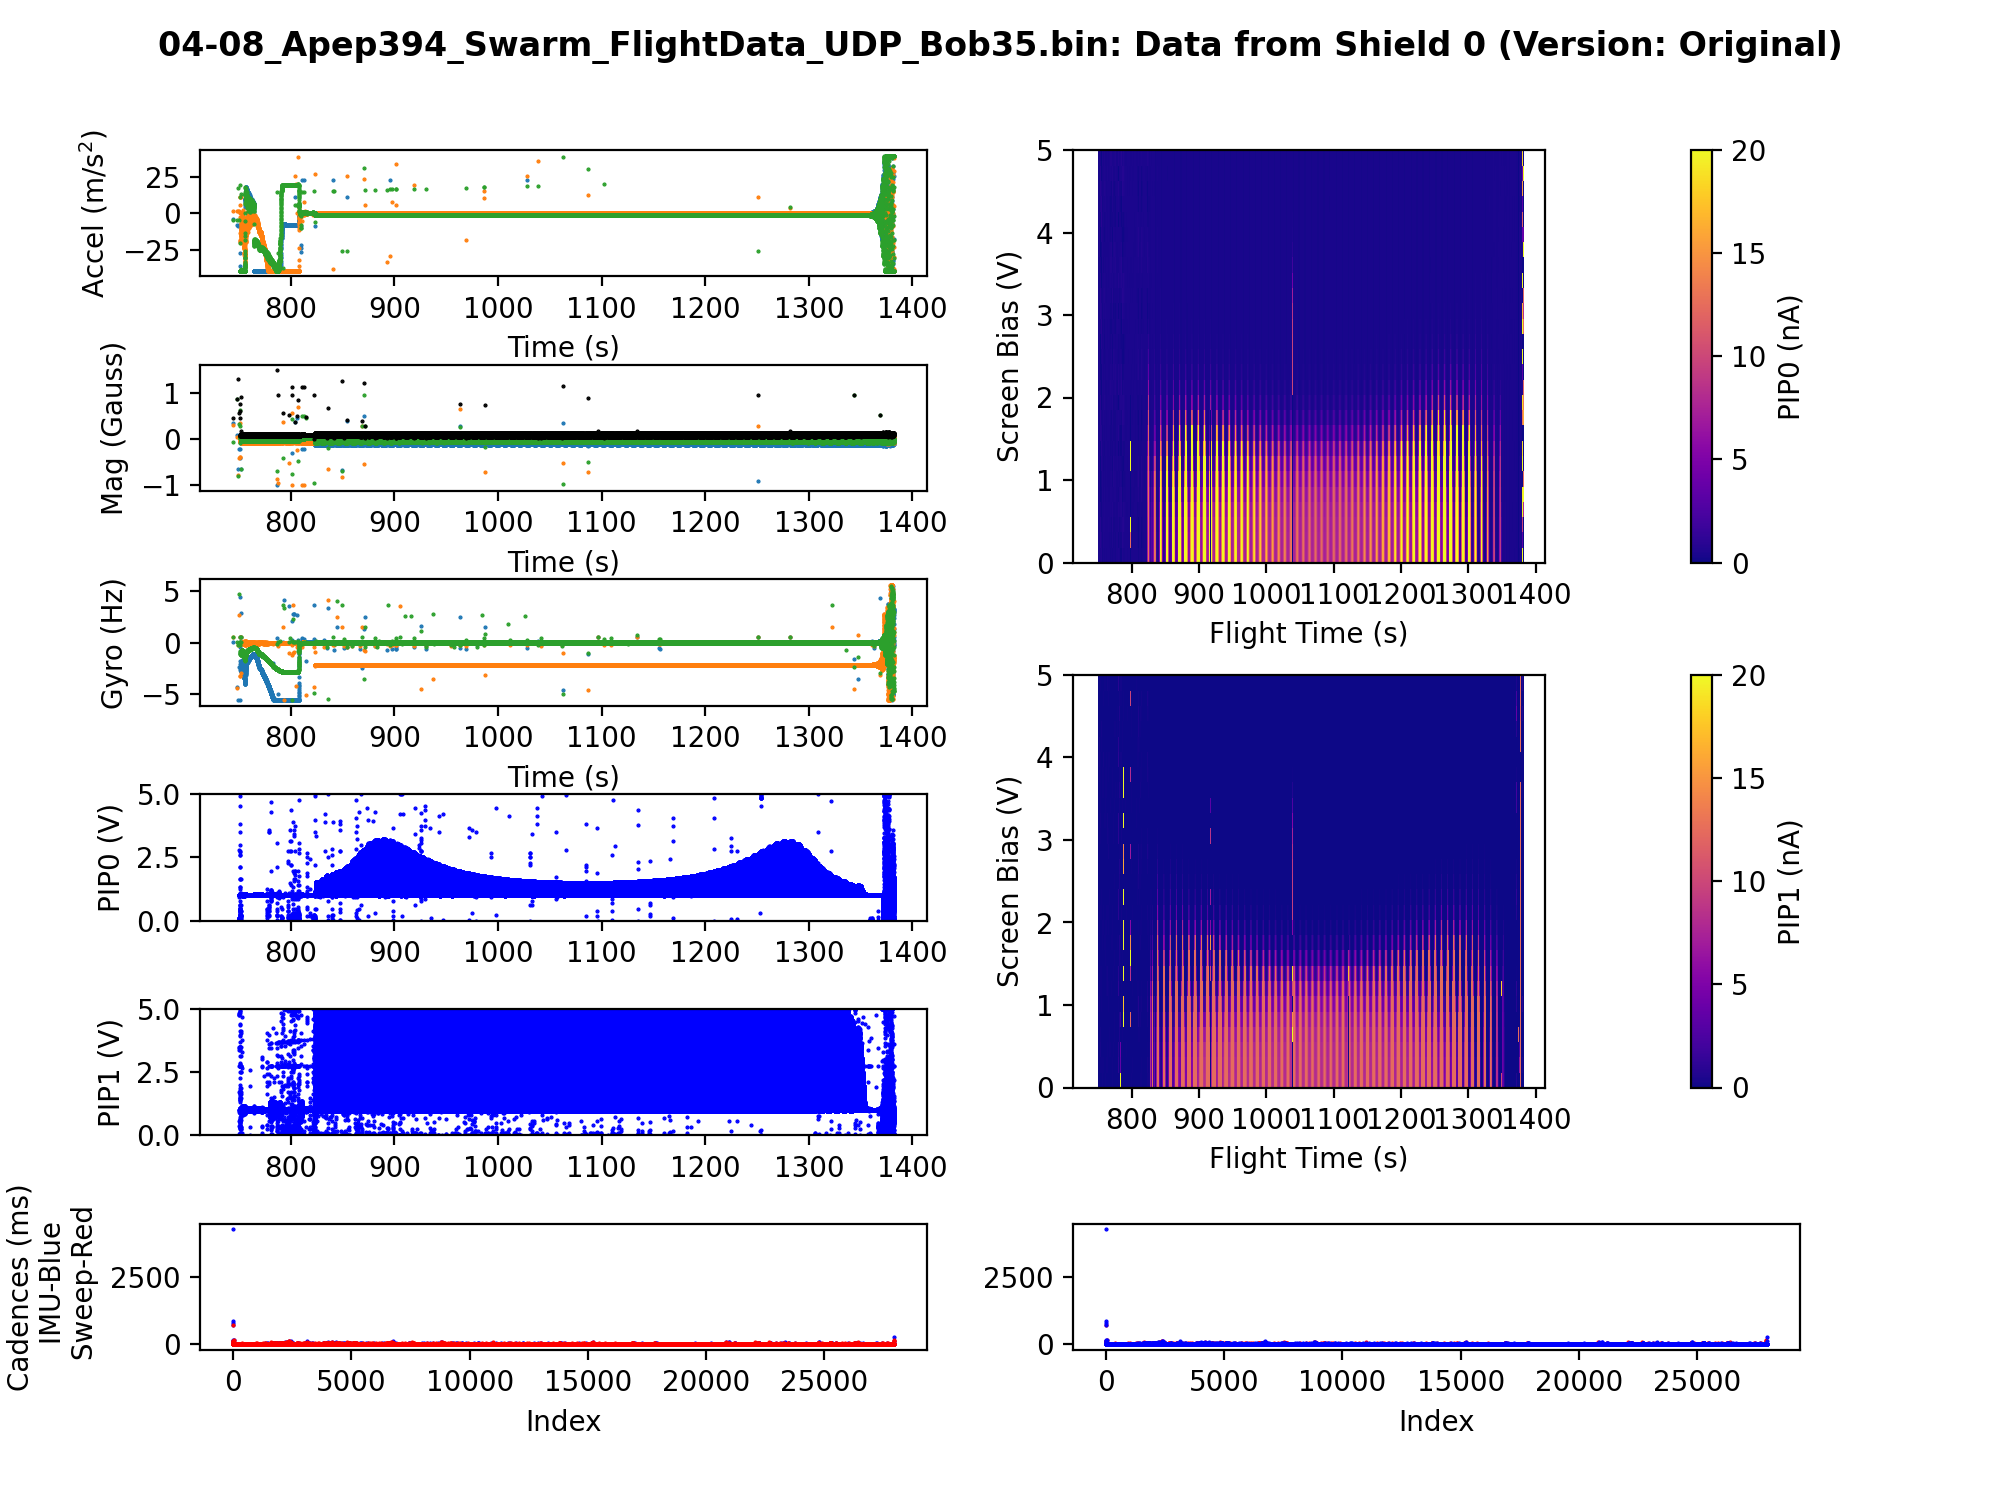

1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done


<ipython-input-11-9e0878061d36>:107: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sweepPlot, sweep_voltage, pip0_rot, cmap='plasma', **cplt_kwargs['pip0'])
<ipython-input-11-9e0878061d36>:116: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(sweepPlot, sweep_voltage, pip1_rot, cmap='plasma', **cplt_kwargs['pip1'])


9 Done


In [11]:
matplotlib.use('nbagg')
import matplotlib.cm as cm
import scipy.signal as sig
from scipy.interpolate import interp1d
from scipy.io import savemat, loadmat
from __future__ import division

dots = True

gs_left = plt.GridSpec(6, 2,  hspace=0.7)

# Set up dots or not more cleanly
line_style = '-'
if dots:
    line_style = '.'

markersize = 1
if plt.fignum_exists(1): plt.close(1)
fig = plt.figure(1, figsize=(10, 7.5))

# Accel
ax1 = fig.add_subplot(gs_left[0,0])
plt.plot(imuPlot, axPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, ayPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, azPlot, line_style, markersize=markersize) 
plt.ylabel("Accel (m/s$^2$)")
#plt.ylim([-2, 2])
#plt.xlim([75, 100])
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("1 Done")

# Mag
fig.add_subplot(gs_left[1,0],sharex=ax1)
plt.plot(imuPlot, mxPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, myPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, mzPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, magfullPlot, line_style, markersize=markersize, color='black')
#plt.ylim([-0.2, 0.25])
if np.isin('mag', list(ylims_dct.keys())): plt.ylim(ylims_dct['mag'])
plt.ylabel("Mag (Gauss)") 
#plt.xlim([75, 100])
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("2 Done")

# Gyro
fig.add_subplot(gs_left[2,0],sharex=ax1)
plt.plot(imuPlot, gxPlot, line_style, markersize=markersize) 
plt.plot(imuPlot, gyPlot, line_style, markersize=markersize)  
plt.plot(imuPlot, gzPlot, line_style, markersize=markersize) 
plt.ylabel("Gyro (Hz)")
#plt.ylim([-0.5, 0.5])  
#plt.xlim([75, 100])
plt.xticks(visible=True)
plt.xlabel("Time (s)")
print ("3 Done")

# First PIP (line)
axP = fig.add_subplot(gs_left[3,0], sharex=ax1)
plt.plot(sweepTimeLPlot, pip0LPlot, line_style, markersize=markersize, color='blue')
plt.ylabel("PIP0 (V)")
#plt.ylim([0.8, 1.2])
plt.ylim(pip0LnLims)
plt.xlim(xlims)
print("4 Done")

# Second PIP (line)
fig.add_subplot(gs_left[4,0], sharex=axP)
plt.plot(sweepTimeLPlot, pip1LPlot, line_style, markersize=markersize, color='blue')
#plt.ylim([0.8, 1.2])
plt.xlim(xlims2)
plt.ylim(pip1LnLims)
plt.ylabel("PIP1 (V)")
print("5 Done")

# Cadence (sweep on top)
axis2 = fig.add_subplot(gs_left[5,0])
plt.plot(np.diff(imuPlot)*1E3, line_style, color='blue', markersize=markersize)
plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
#plt.ylim([20,50])
#plt.xlim([2000,4000])
plt.ylabel("Cadences (ms)\n IMU-Blue\n Sweep-Red")
plt.xlabel("Index")
print ("6 Done")

# Cadence (imu on top)
fig.add_subplot(gs_left[5,1], sharex=axis2, sharey=axis2)
plt.plot(np.diff(sweepPlot)*1E3, line_style, color='red', markersize=markersize)
plt.plot(np.diff(imuPlot)*1E3, line_style, color='blue', markersize=markersize)
#plt.ylim([20,50])
#plt.xlim([2000,4000])
plt.xlabel("Index")
print ("7 Done")

# **Plot sweep time vs sweep data (Color plots)**

# commands to reorient pip array to match with other axes
pip0_rot = np.rot90(pip0Plot, k=1, axes=(0, 1))
pip1_rot = np.rot90(pip1Plot, k=1, axes=(0, 1))

sweep_voltage = np.linspace(0,5,28)

line_style = '-'

ax1 = plt.subplot2grid((5,2),(0,1),rowspan = 2, sharex=axP)
plt.pcolormesh(sweepPlot, sweep_voltage, pip0_rot, cmap='plasma', **cplt_kwargs['pip0'])
plt.xlim(xlims)
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP0 (nA)")
print ("8 Done")

ax1 = plt.subplot2grid((5,2),(2,1),rowspan = 2, sharex=ax1)
plt.pcolormesh(sweepPlot, sweep_voltage, pip1_rot, cmap='plasma', **cplt_kwargs['pip1'])
plt.xlim(xlims2)
ax1.set_xlabel("Flight Time (s)")
ax1.set_ylabel("Screen Bias (V)")
cb = plt.colorbar(pad = 0.2)
cb.set_label("PIP1 (nA)")
print ("9 Done")
        
# Adjust figure
fig.subplots_adjust(right=.90)
fig.subplots_adjust(left=0.10)
fig.subplots_adjust(top=0.90)
fig.subplots_adjust(bottom=0.10)
fig.subplots_adjust(hspace=0.75)

if interruptValue and len(interruptArray) > 100:
    interruptNum = str(interruptArray[100]-577.271) + " seconds"
else:
    interruptNum = "None"
if interruptNum == "None" and not alwaysPrintInterrupt: interruptStr = ''
else: interruptStr = '\nInterrupt Time: %s'

if not np.all(np.isin([interruptOffset, T0_offset], [0])): 
    subTitle = "\n(modified %ss for interrupt offset, %s for flight time)" %(interruptOffset, T0_offset)
else: subTitle=""
plt.suptitle(file_name+": Data from Shield %s (Version: %s)%s%s" 
             %(shieldID, version, interruptStr, subTitle), fontweight='bold')

plt.show()

In [127]:
# ## %% For ADC Calibrations %%
# # Select PIP, step voltage difference and offset from start/end of step
# pipLData = pip0LPlot.copy() # For Checking PIP 0 
# # pipLData = pip1LPlot.copy() # For Checking PIP 1
# dV = .2 # step voltage difference 
# dStep = 10 # Offset (in # of points) from start/end of step

# diff = np.diff(pipLData)
# locs = np.where(dV<=np.abs(diff))[0]
# print('Times %s\n' % (sweepTimeLPlot[locs])) 
# for sloc, eloc in zip(locs[0:-1], locs[1:]): 
#     avg = np.mean(pipLData[sloc+dStep:eloc-dStep])
#     print('Times %.2f-%.2fs: Average %.3f V' % (sweepTimeLPlot[sloc+dStep], sweepTimeLPlot[eloc-dStep-1], avg))

In [8]:
# print(len(imuTime))
# print(len(sweepTime))
# plottype='repeat'
# tbnds = np.array([0, 1400])-T0_offset
tbnds = np.array([0, 1000])-T0_offset

if plottype=='original': 
    imuLocs = np.where(np.logical_and(tbnds[0]<=imuTime, imuTime <= tbnds[1]))[0]
    sweepLocs = np.where(np.logical_and(tbnds[0]<=sweepTime, sweepTime <= tbnds[1]))[0]

    # Shield 33:
    badIMU = [50, 1722, 1884, 1946, 1971, 2137, 2198, 2201, 2217, 2235, 2260, 2263, 2265, 2277, 2280, 2283, 2302, 2310, 2311, 2312, 2317, 2318, 2714, 5565, 7393, 7844, 8536, 8748, 8769, 12154, 13340, 13794, 18068]
    badSweep = [1448, 1545, 1748, 1763, 1805, 2014, 2030, 2055, 2066, 2091, 2133, 2189, 2210, 2260, 2303, 2304, 2305, 2311, 2315, 2385, 2637, 2716, 3058, 8038, 9206, 23267]

#     badIMU = [0, 1, 3, 4, 6, 8, 10, 13, 37, 1348, 1771, 1833, 2095, 2433, 2756, 2759, 3119, 3136, 3948, 4150, 4599, 4678, 5490, 7526, 8206, 9474, 10202, 10385, 10421, 12307, 14661, 15113, 15549, 16002, 16032, 16485, 20257, 23334, 23780, 24246, 24821, 27995, 27996]
#     badSweep = [0, 1, 2, 3, 4, 2078, 2149, 2336, 2344, 3490, 3946, 5787, 7630, 7670, 8483, 8965, 9369, 15723, 22426, 22868, 23136, 27446]

    imuLocs = np.delete(imuLocs, badIMU)
    sweepLocs = np.delete(sweepLocs, badSweep)
    
    version = 'Original'
    imuPlot = imuTime[imuLocs]
    axPlot = ax[imuLocs]
    ayPlot = ay[imuLocs]
    azPlot = az[imuLocs]
    gxPlot = gx[imuLocs]
    gyPlot = gy[imuLocs]
    gzPlot = gz[imuLocs]
    mxPlot = mx[imuLocs]
    myPlot = my[imuLocs]
    mzPlot = mz[imuLocs]
    sweepPlot = sweepTime[sweepLocs] #sweepPlot = sweepTime.tolist()
    pip0Plot = pip0nA[sweepLocs]
    pip1Plot = pip1nA[sweepLocs]    
    pip0LPlot = pip0.copy()[sweepLocs].flatten()
    pip1LPlot = pip1.copy()[sweepLocs].flatten()

else: 
    imuRptLocs = np.where(np.logical_and(tbnds[0]<=imuTimeRpt, imuTimeRpt<=tbnds[1]))[0]
    sweepRptLocs = np.where(np.logical_and(tbnds[0]<=sweepTimeRpt, sweepTimeRpt<=tbnds[1]))[0]
    # Shield 33:
    badIMURpt = [1645, 1688, 1778, 1856, 1887, 2096, 2100, 2126, 2166, 2246, 2252, 2260, 2297, 2301, 2305, 2306, 2713, 2715, 2968, 3186, 4628, 6677, 8518, 16797, 21034, 22034, 24561, 26771]
    badSweepRpt = [1710, 2077, 2097, 2163, 2164, 2167, 2209, 2213, 2227, 2249, 2260, 2326, 2330, 2332, 2333, 2334, 2597, 2736, 2737, 3071, 5893, 6267, 24700, 24712, 25151, 25551, 26005, 27344]

#     badIMURpt = [0, 1, 2, 3, 4, 1710, 1718, 2139, 2387, 2525, 3073, 3314, 3461, 4190, 5852, 5932, 6368, 6841, 8304, 9734, 10399, 10647, 11098, 14966, 15403, 18946, 21822, 21824, 21826, 22266, 22268, 22270, 22338, 22783, 24463, 24656]
#     badSweepRpt = [0, 1, 2, 3, 7, 13, 1869, 2189, 2234, 2262, 2322, 2388, 2646, 2982, 3692, 5342, 5609, 6239, 6631, 6684, 9093, 9540, 11440, 11704, 11892, 12157, 12555, 16925, 25566, 26017, 27857]

    imuRptLocs = np.delete(imuRptLocs, badIMURpt)
    sweepRptLocs = np.delete(sweepRptLocs, badSweepRpt)
    
    version = 'Repeat'
    imuPlot = imuTimeRpt[imuRptLocs]
    axPlot = axRpt[imuRptLocs]
    ayPlot = ayRpt[imuRptLocs]
    azPlot = azRpt[imuRptLocs]
    gxPlot = gxRpt[imuRptLocs]
    gyPlot = gyRpt[imuRptLocs]
    gzPlot = gzRpt[imuRptLocs]
    mxPlot = mxRpt[imuRptLocs]
    myPlot = myRpt[imuRptLocs]
    mzPlot = mzRpt[imuRptLocs]
    sweepPlot = sweepTimeRpt[sweepRptLocs] #sweepPlot = sweepTime.tolist()
    pip0Plot = pip0RptnA[sweepRptLocs]
    pip1Plot = pip1RptnA[sweepRptLocs]  
    pip0LPlot = pip0Rpt.copy()[sweepRptLocs].flatten()
    pip1LPlot = pip1Rpt.copy()[sweepRptLocs].flatten()
    
sweepTimeLPlot = []
for t in sweepPlot:
    for n in range(0, sweepSize):
        sweepTimeLPlot.append(t+sweepStepDt*n)
sweepTimeLPlot = np.array(sweepTimeLPlot)
sweepTimeLPlot = sweepTimeLPlot - T0_offset

magfullPlot = np.sqrt(mxPlot**2+myPlot**2+mzPlot**2)
if 0<len(interruptArray): interruptValue = True
else: interruptValue=False

In [65]:
# # # Shield 33: 
# # badIMU = [50, 1722, 1884, 1946, 1971, 2137, 2198, 2201, 2217, 2235, 2260, 2263, 2265, 2277, 2280, 2283, 2302, 2310, 2311, 2312, 2317, 2318, 2714, 5565, 7393, 7844, 8536, 8748, 8769, 12154, 13340, 13794, 18068]
# # badSweep = [1448, 1545, 1748, 1763, 1805, 2014, 2030, 2055, 2066, 2091, 2133?, 2189, 2210, 2260, 2303, 2304, 2305, 2311, 2315, 2385, 2637, 2716, 3058, 8038, 9206, 23267]
# # badIMURpt = [1645, 1688, 1778, 1856, 1887, 2096, 2100, 2126, 2166, 2246, 2252, 2260, 2297, 2301, 2305, 2306, 2713, 2715, 2968, 3186, 4628, 6677, 8518, 16797, 21034, 22034, 24561, 26771]
# # badSweepRpt = [1710, 2077, 2097, 2163, 2164, 2167, 2209, 2213, 2227, 2249, 2260, 2326, 2330, 2332, 2333, 2334, 2597, 2736, 2737, 3071, 5893, 6267, 24700, 24712, 25151, 25551, 26005, 27344]
# # imuQ=[2198]; imuRptQ=[2126, 2260]; sweepQ = [1805,2133]; sweepRptQ=[2167, 2331,] # Indicies that I question

# # Shield 34: 
# badIMU = [2240, 2636, 3301, 3619, 3795, 5626, 6372, 7142, 7302, 7632, 8190, 9061, 9685, 10495, 10743, 10879, 11330, 13321, 14044, 14273, 14720, 14724, 16068, 16241, 17353, 17366, 17759, 17804, 19514, 20190, 20540, 21035, 22330, 22566, 22921, 23140, 23591, 23865, 24193, 24248, 24604, 24833, 24855, 24899, 24900] 
# badSweep = [133, 499, 3975, 4548, 4812, 4905, 5420, 5753, 7268, 12913, 13728, 14180, 14830, 17352, 17837, 18515, 18976, 19426, 21832, 24144, 24312, 24808, 24870]
# badIMURpt=[0, 1, 634, 5985, 7041, 7128, 7174, 7915, 8943, 10384, 10780, 11138, 11334, 11625, 12291, 12562, 13093, 13902, 14941, 16317, 17397, 18389, 18832, 21169, 21341, 21419, 21957, 23353, 23355, 23357, 23359, 23445, 23805, 23807, 23809, 24031, 24320, 24683, 24887, 24888, 24889]
# badSweepRpt=[1749, 5642, 5643, 7297, 7741, 8055, 8193, 11195, 11742, 12143, 12763, 12967, 13417, 13755, 18034, 18363, 18484, 19681, 21560, 22014, 22498, 23294, 24239, 24488, 24829, 24877, 24878, 24879, 24880]
# imuRptQ = [1] 


# Shield 35: 
# badIMU = [0, 1, 3, 4, 6, 8, 10, 13, 37, 1348, 1771, 1833, 2095, 2433, 2756, 2759, 3119, 3136, 3948, 4150, 4599, 4678, 5490, 7526, 8206, 9474, 10202, 10385, 10421, 12307, 14661, 15113, 15549, 16002, 16032, 16485, 20257, 23334, 23780, 24246, 24821, 27995, 27996]
# badSweep = [0, 1, 2, 3, 4, 2078, 2149, 2336, 2344, 3490, 3946, 5787, 7630, 7670, 8483, 8965, 9369, 15723, 22426, 22868, 23136, 27446]
# badIMURpt = [0, 1, 2, 3, 4, 1710, 1718, 2139, 2387, 2525, 3073, 3314, 3461, 4190, 5852, 5932, 6368, 6841, 8304, 9734, 10399, 10647, 11098, 14966, 15403, 18946, 21822, 21824, 21826, 22266, 22268, 22270, 22338, 22783, 24463, 24656]
# badSweepRpt = [0, 1, 2, 3, 7, 13, 1869, 2189, 2234, 2262, 2322, 2388, 2646, 2982, 3692, 5342, 5609, 6239, 6631, 6684, 9093, 9540, 11440, 11704, 11892, 12157, 12555, 16925, 25566, 26017, 27857]
5609
# imuQ = [0, 1, 3, 4, 6, 8, 10, 13]; imuRptQ = [0, 1, 2, 3, 4]; sweepRptQ = [0, 1, 2, 3, 7]
print(', '.join([str(val+1) for val in potLocs[14:]])) 

6239, 6631, 6684, 9093, 9540, 11440, 11704, 11892, 12157, 12555, 16925, 25566, 26017, 27857


In [67]:
time_arr = sweepPlot.copy(); 
# time_arr = imuPlot.copy()
potLocs = np.where(np.diff(time_arr)<0)[0]
print(potLocs)
for loc in potLocs: 
    if not np.isin(loc, [0,1]): print('%s\t: %s' % (loc, time_arr[loc-2:loc+3]))
    else: print('%s\t: %s' % (loc, time_arr[0:loc+4]))

[]


In [63]:
np.where(potLocs==5609)# # time_arr = sweepPlot.copy(); 
# time_arr = imuPlot.copy()
# potLocs = np.where(np.diff(time_arr)<0)[0]
# print(potLocs)
# for loc in potLocs: 
#     print('%s\t: %s' % (loc, time_arr[loc-2:loc+3]))

(array([13]),)

In [61]:
loc = 2
time_arr[loc-2:loc+7]


array([733.601128, 737.871524, 738.884724, 587.219672, 739.883724,
       740.638528, 740.838324, 740.731584, 741.015924])

<IPython.core.display.Javascript object>


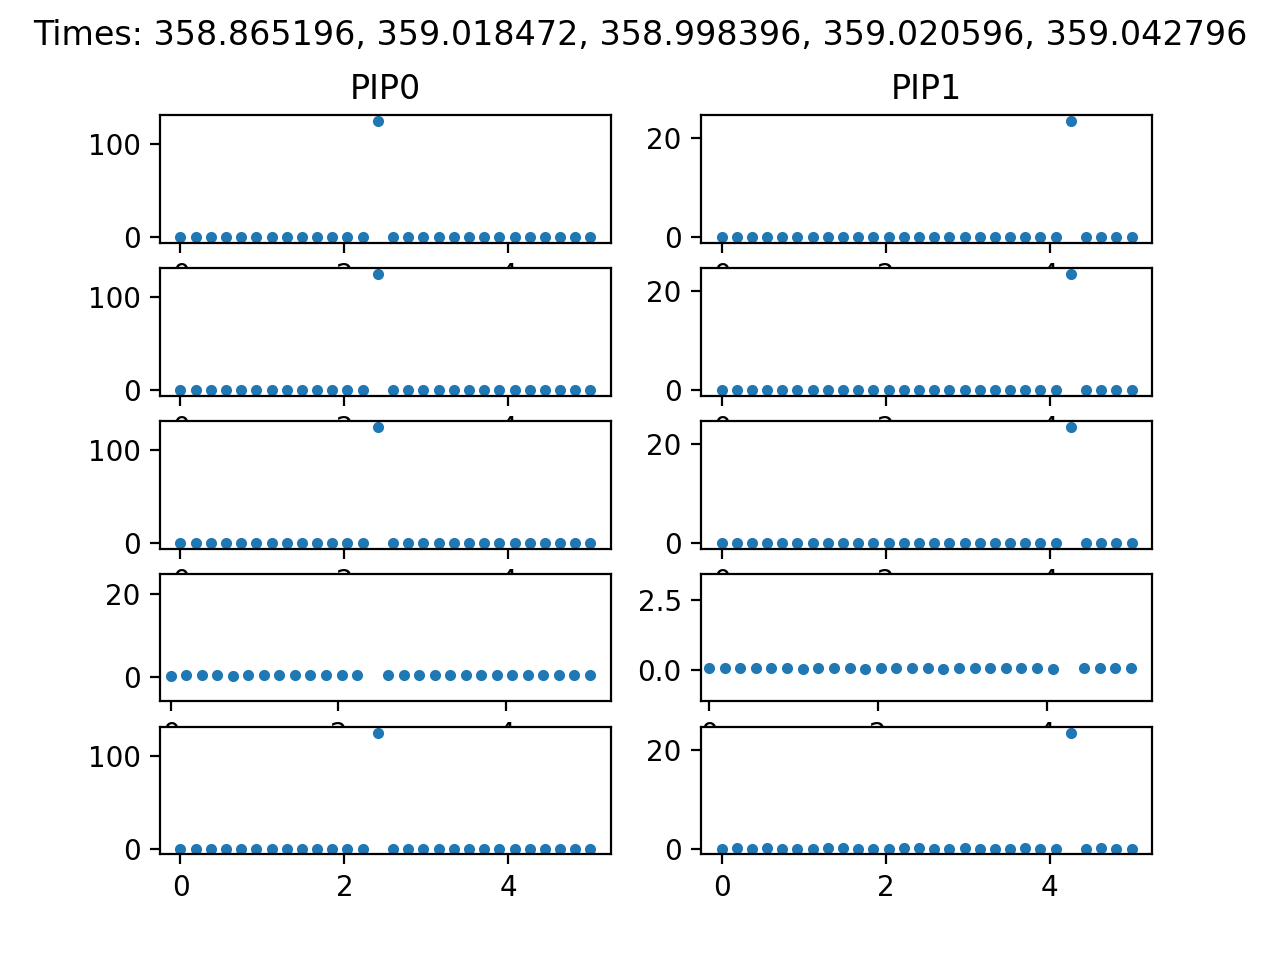

Text(0.5, 0.98, 'Times: 358.865196, 359.018472, 358.998396, 359.020596, 359.042796')

In [88]:
inx = 2167
fig2 = plt.figure(2) 
pip0Current = pip0Plot.copy()
pip1Current = pip1Plot.copy()
# for idx, plt_inx in zip([[1,2], [3,4], [5, 6]], np.arange(inx-1, inx+2, 1)): 
#     ax0 = fig2.add_subplot(3,2, idx[0])
#     ax1 = fig2.add_subplot(3,2, idx[1])
for idx, plt_inx in zip([[1,2], [3,4], [5, 6], [7,8], [9,10]], np.arange(inx-2, inx+3, 1)): 
    ax0 = fig2.add_subplot(5,2, idx[0])
    ax1 = fig2.add_subplot(5,2, idx[1])
    if idx[0]==1: ax0.set_title('PIP0'); ax1.set_title('PIP1')
    ax0.plot(sweep_voltage, np.flip(pip0Current[inx]), '.')
    ax1.plot(sweep_voltage, np.flip(pip1Current[inx]), '.')
# fig2.suptitle('Times: %s' % (', '.join([str(val) for val in sweepPlot[inx-1:inx+2]])))
fig2.suptitle('Times: %s' % (', '.join([str(val) for val in sweepPlot[inx-2:inx+3]])))

In [21]:
locs = np.where(np.logical_and(740<=sweepTime, sweepTime<=1385))[0]
locsrpt = np.where(np.logical_and(740<=sweepTimeRpt, sweepTimeRpt<=1385))[0]
print(sweepTime[locs])
print(sweepTimeRpt[locsrpt])
sweepTime_trim = sweepTime[locs]
sweepTimeRpt_trim = sweepTimeRpt[locsrpt]

[ 908.700908 1227.039524 1261.490221 ...  941.149     941.171204
  941.193396]
[1275.965724  740.017     740.039204 ...  931.114604  931.136796
  931.158996]


In [43]:
np.where(np.diff(sweepTime_trim)<0)[0]

(array([    0,  2144, 23117]),)

In [44]:
np.where(np.diff(sweepTimeRpt_trim)<0)[0]

array([    1,     7,  2227,  2254,  5596, 25541, 25992])

In [67]:
# np.delete(sweepTime_trim, [0, 2144, 23118]) 
inx = 2144
sweepTime_trim[inx-2:inx+3]
sweepTime_trim[0:5]

array([797.541372, 749.985236, 750.695128, 750.828328, 750.850532])

In [68]:
# [2, 8, 2227, 2255, 5596, 25542, 25993]
inx = 25992
sweepTimeRpt_trim[inx-2:inx+3]
sweepTimeRpt_trim[0:5]

array([740.638528, 740.838324, 740.731584, 741.015924, 741.104728])

In [95]:
sweepTimeRpt_trim[0:4]

array([740.638528, 740.838324, 740.731584, 741.015924])

In [63]:
np.isin(sweepTime_trim, sweepTimeRpt_trim)

array([False, False,  True, ..., False, False, False])

In [75]:
# np.delete(sweepTime_trim, [0, 2144, 23118]) 
# np.delete(sweepTime_trimRpt, [2, 8, 2227, 2255, 5596, 25542, 25993])


array([1.01593018, 1.02752686, 1.02172852, 1.02020264, 1.01348877,
       1.0055542 , 1.0055542 , 1.015625  , 1.02142334, 1.02020264,
       1.02630615, 1.01623535, 1.00738525, 1.01074219, 1.0067749 ,
       1.01501465, 1.02722168, 1.02355957, 1.02111816, 1.0168457 ,
       1.00616455, 1.00372314, 1.01348877, 1.01989746, 1.01928711,
       1.02722168, 1.01989746, 1.00982666])

<IPython.core.display.Javascript object>


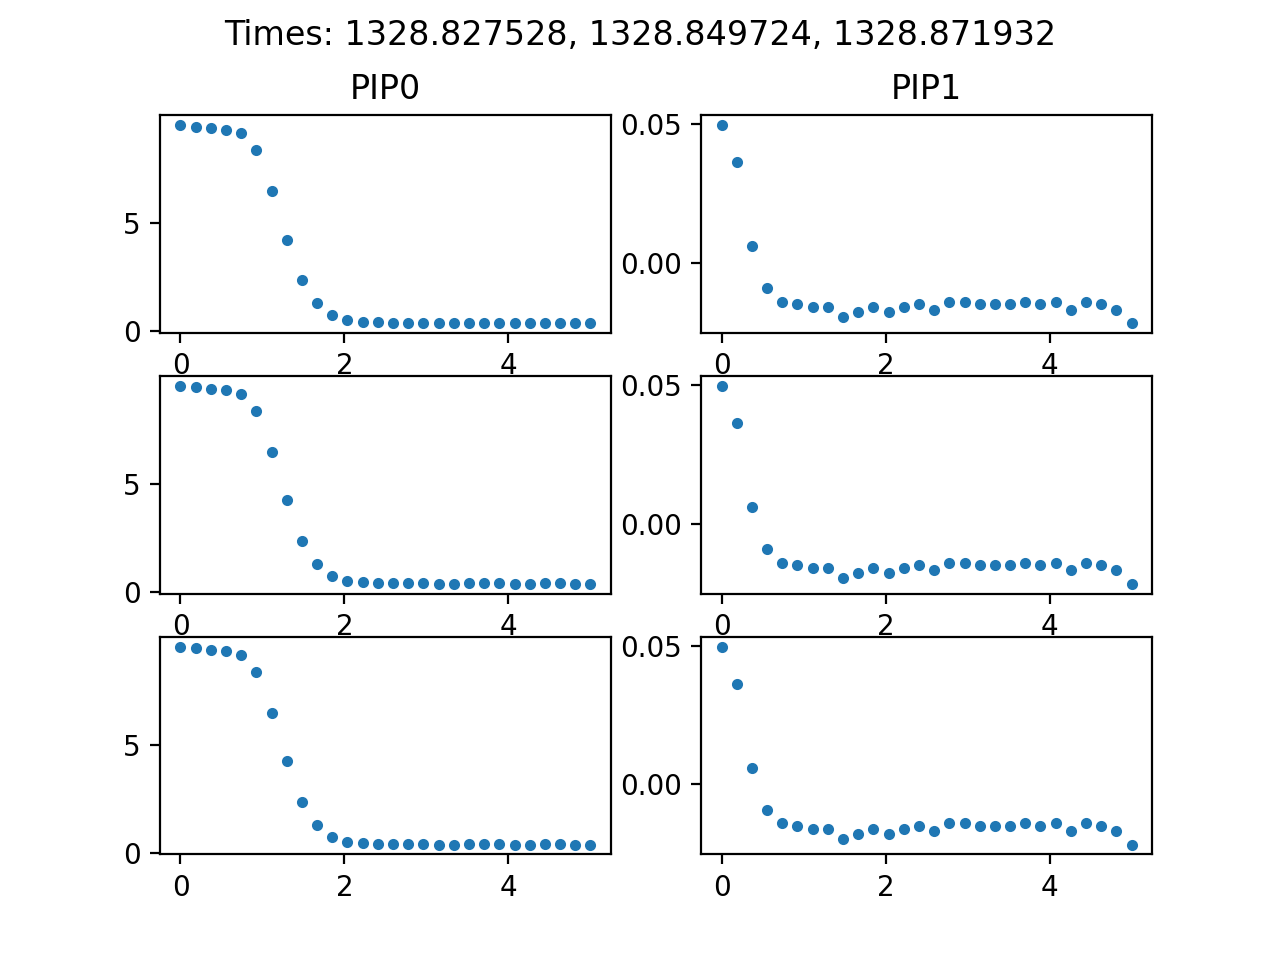

Text(0.5, 0.98, 'Times: 1328.827528, 1328.849724, 1328.871932')

In [106]:
inx = 26000
fig3 = plt.figure(3) 
pip0Current = pip0RptnA[locsrpt].copy()
pip1Current = pip1RptnA[locsrpt].copy()
for idx, plt_inx in zip([[1,2], [3,4], [5, 6]], np.arange(inx-1, inx+2, 1)): 
    ax0 = fig3.add_subplot(3,2, idx[0])
    ax1 = fig3.add_subplot(3,2, idx[1])
    if idx[0]==1: ax0.set_title('PIP0'); ax1.set_title('PIP1')
    ax0.plot(sweep_voltage, np.flip(pip0Current[inx]), '.')
    ax1.plot(sweep_voltage, np.flip(pip1Current[inx]), '.')
fig3.suptitle('Times: %s' % (', '.join([str(val) for val in sweepTimeRpt_trim[inx-1:inx+2]])))

In [107]:
sweep_voltage

array([0.        , 0.18518519, 0.37037037, 0.55555556, 0.74074074,
       0.92592593, 1.11111111, 1.2962963 , 1.48148148, 1.66666667,
       1.85185185, 2.03703704, 2.22222222, 2.40740741, 2.59259259,
       2.77777778, 2.96296296, 3.14814815, 3.33333333, 3.51851852,
       3.7037037 , 3.88888889, 4.07407407, 4.25925926, 4.44444444,
       4.62962963, 4.81481481, 5.        ])